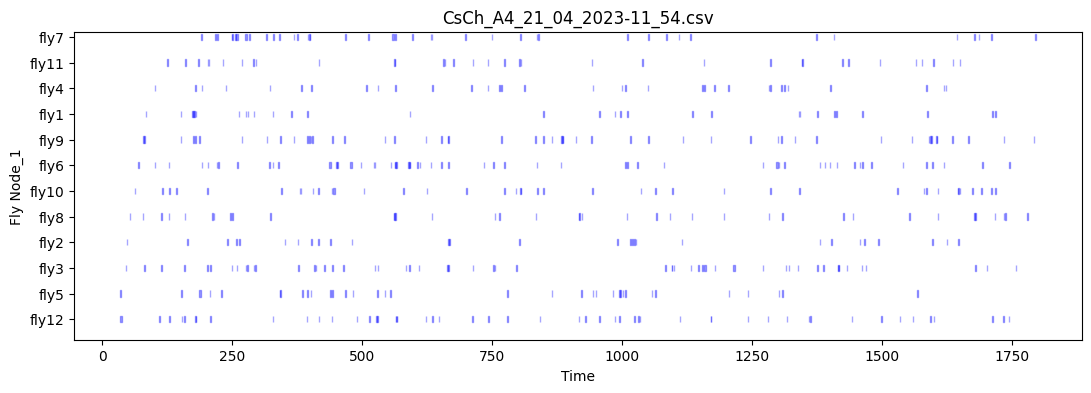

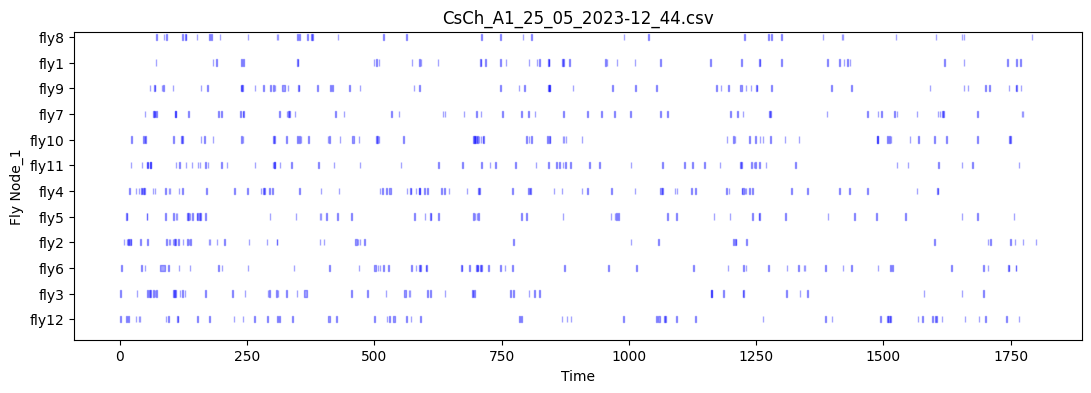

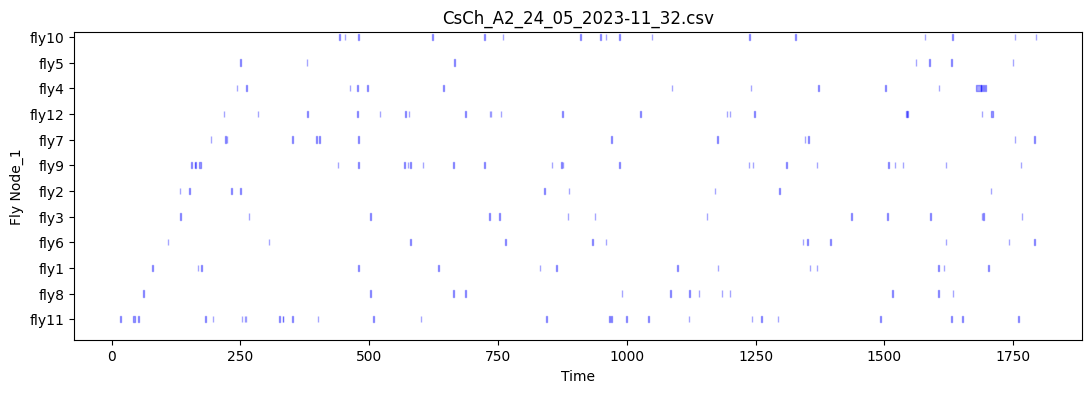

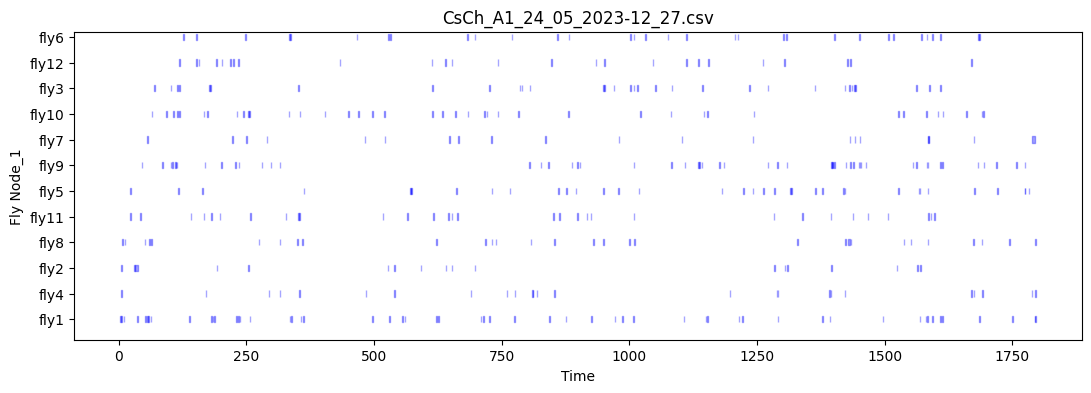

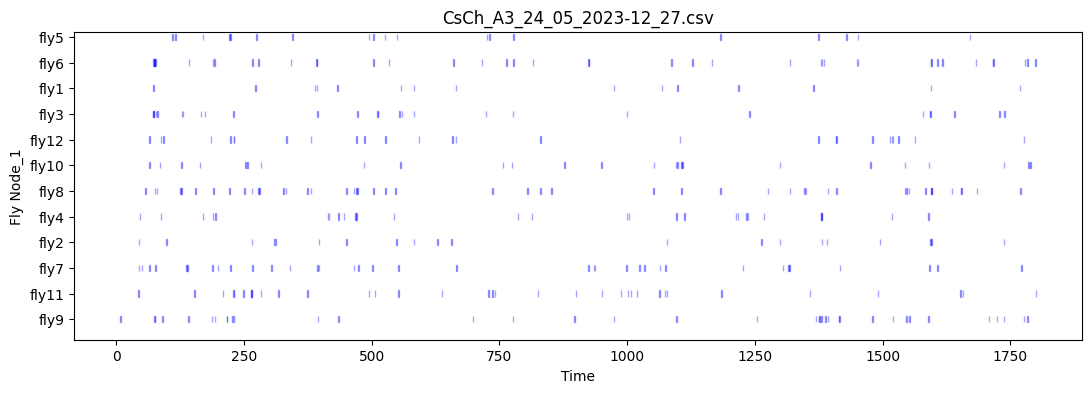

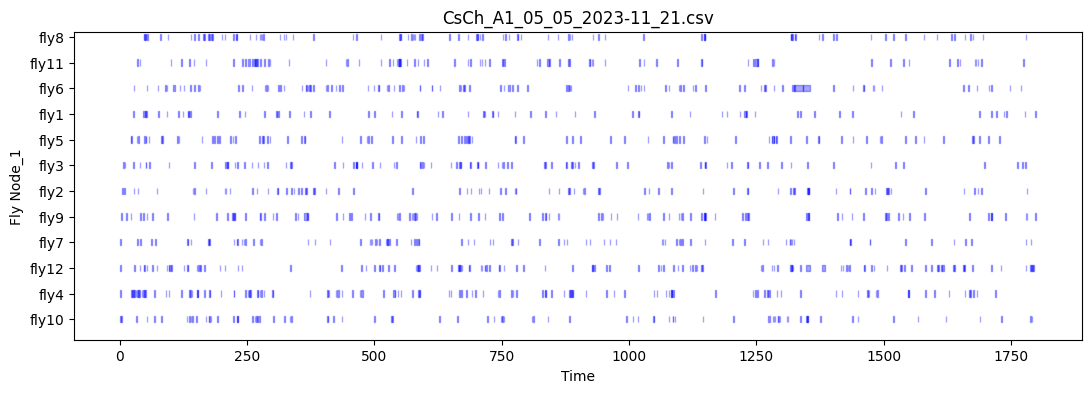

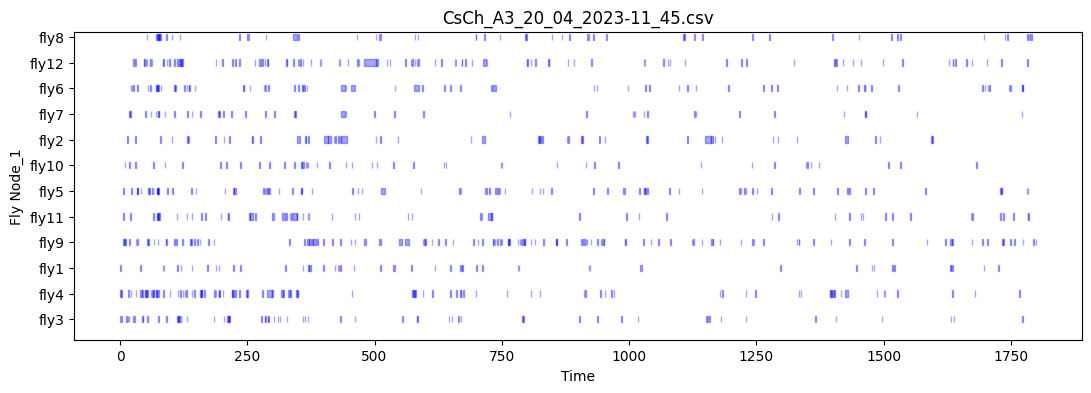

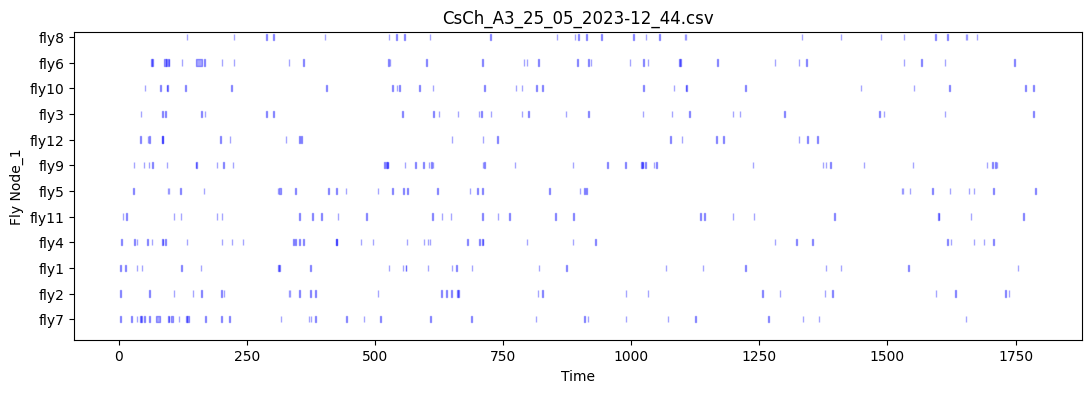

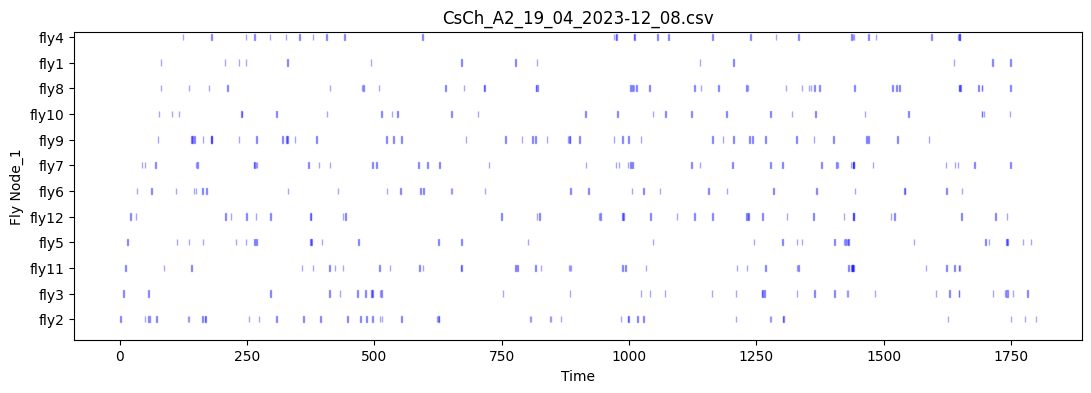

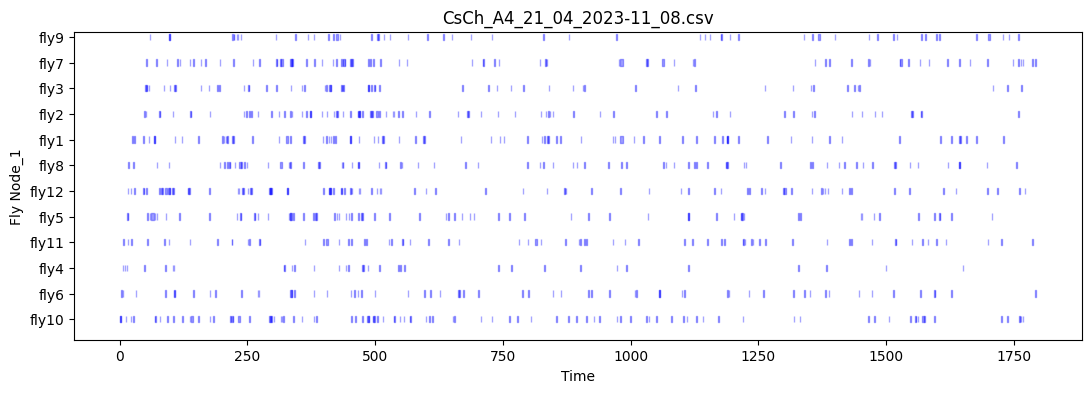

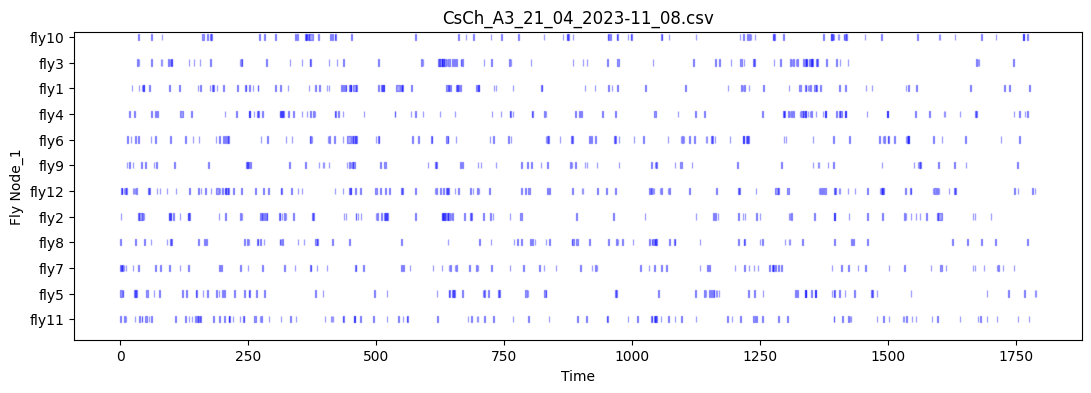

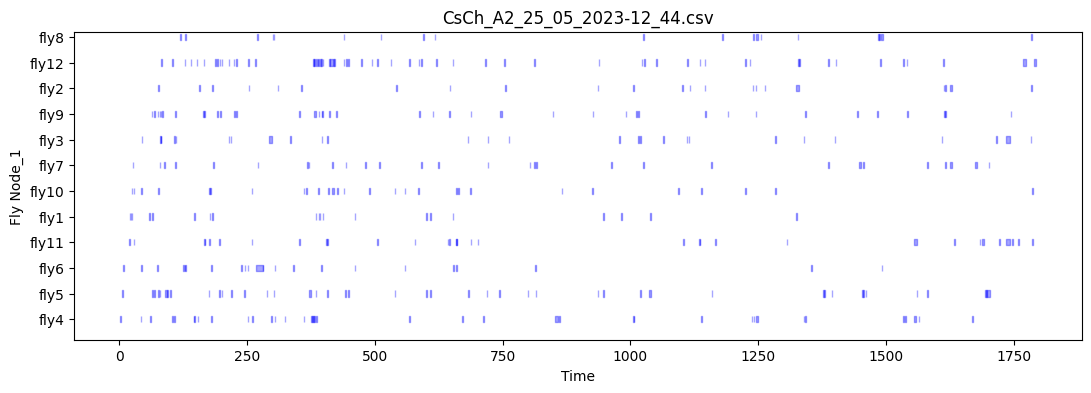

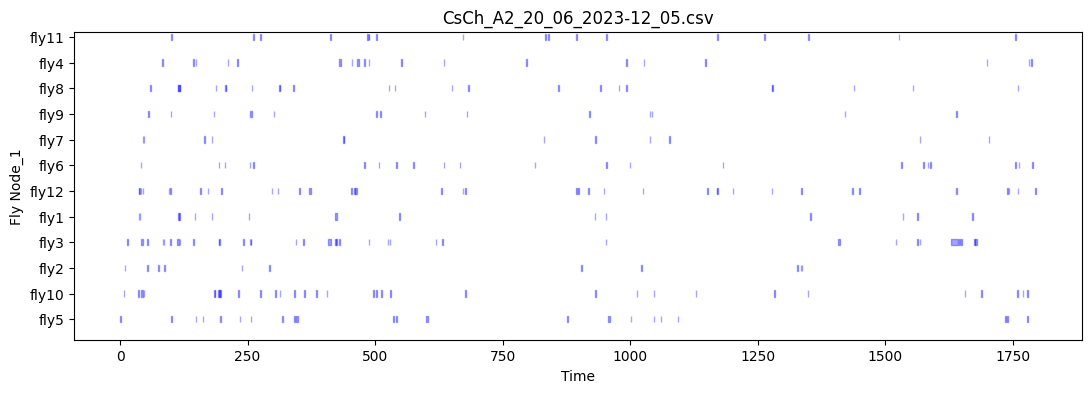

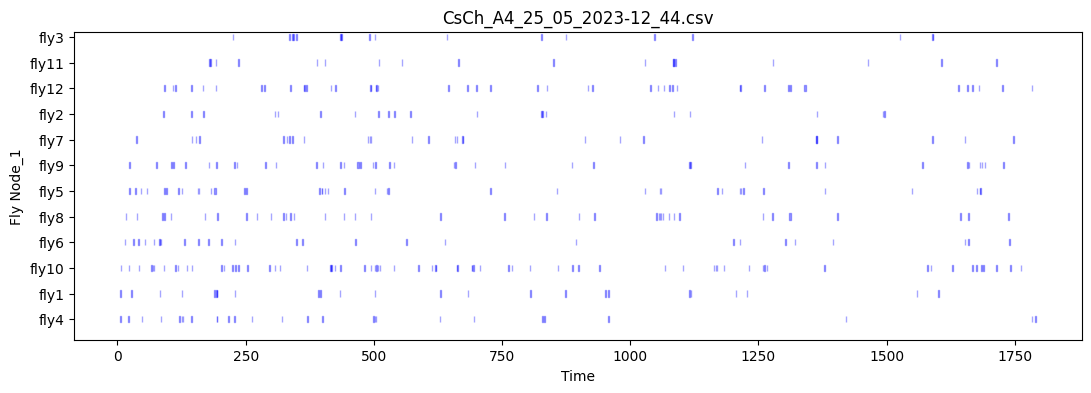

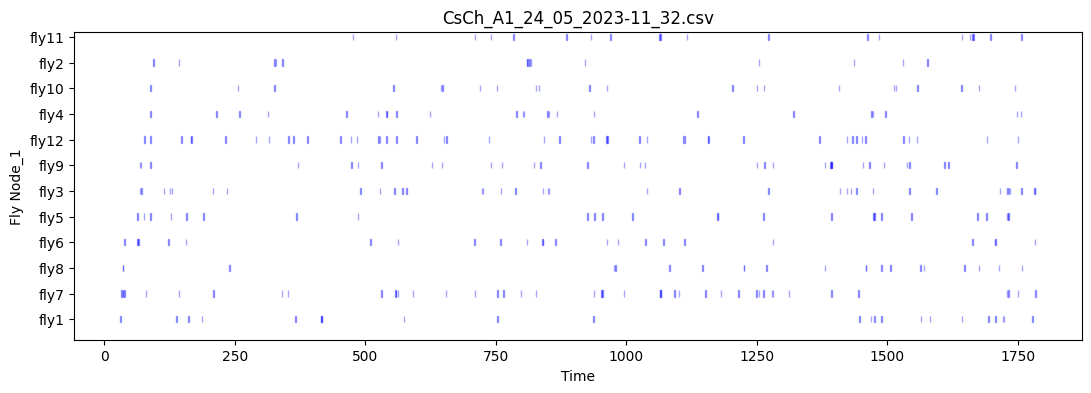

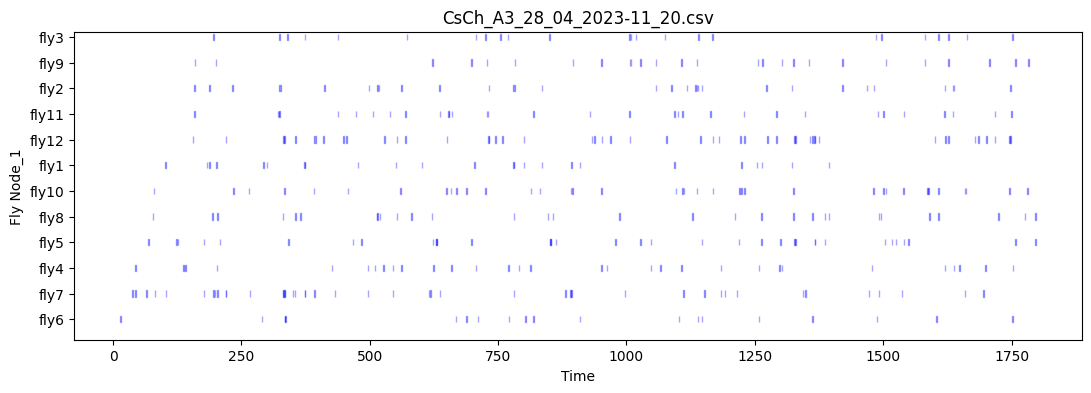

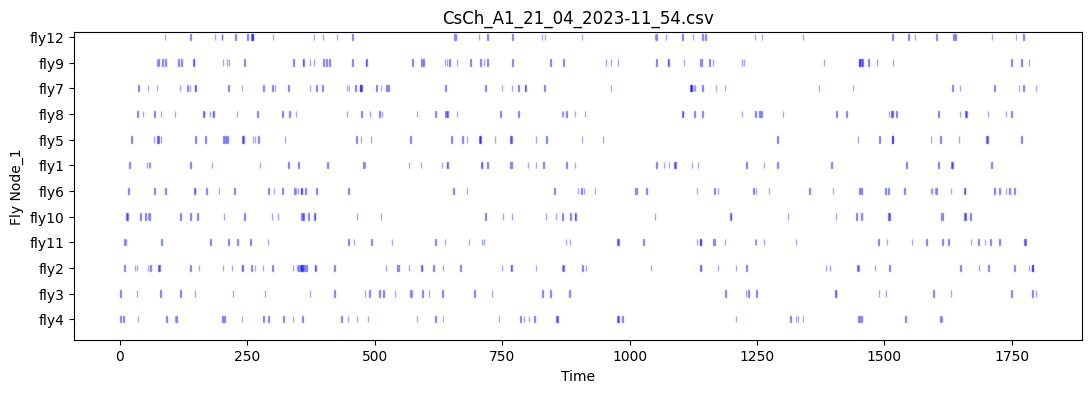

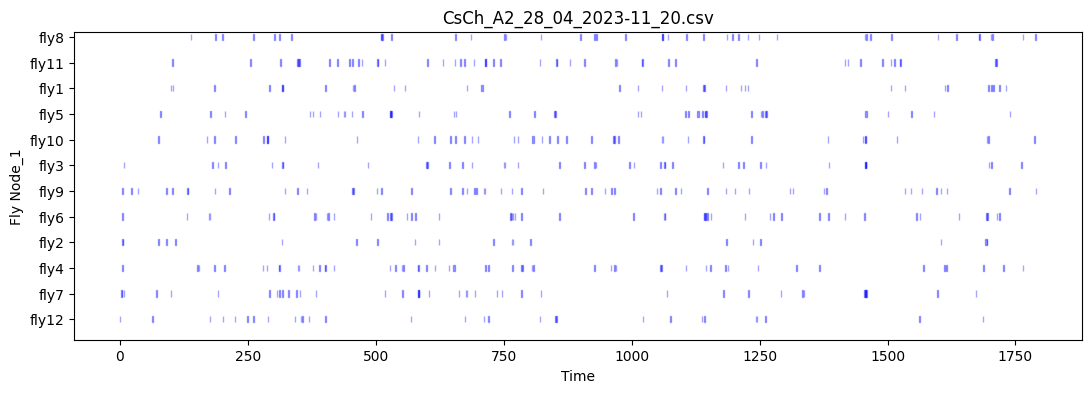

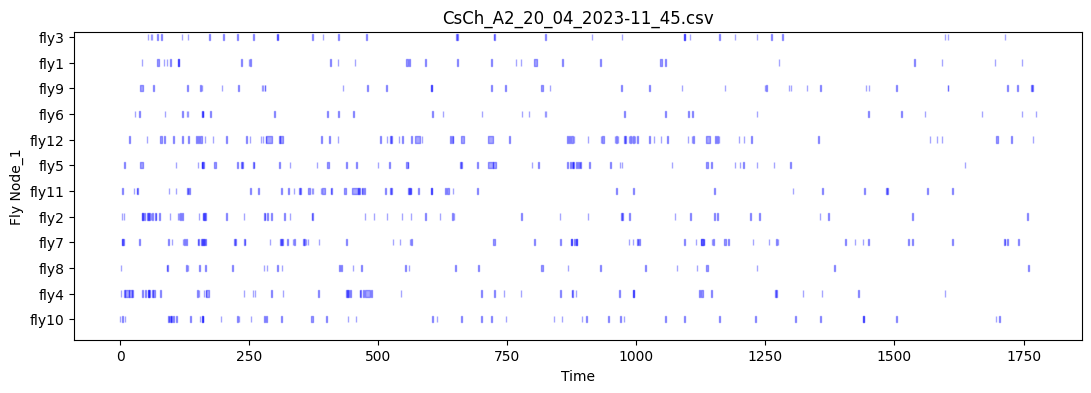

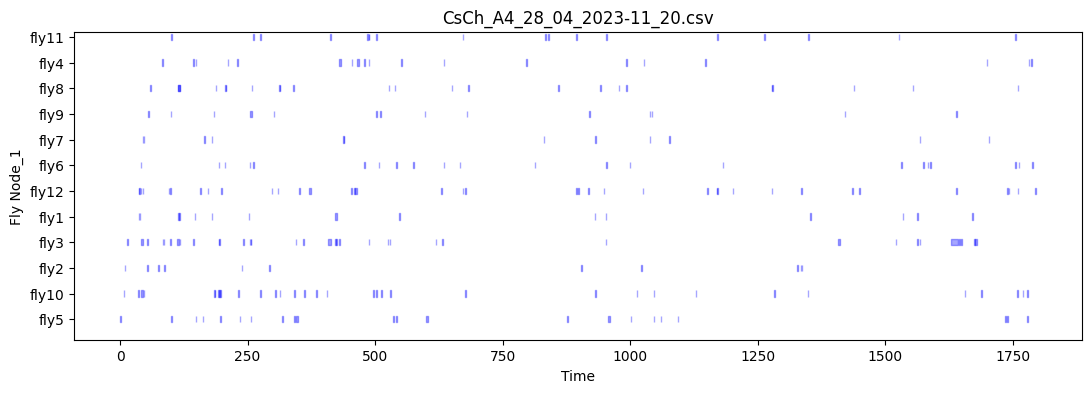

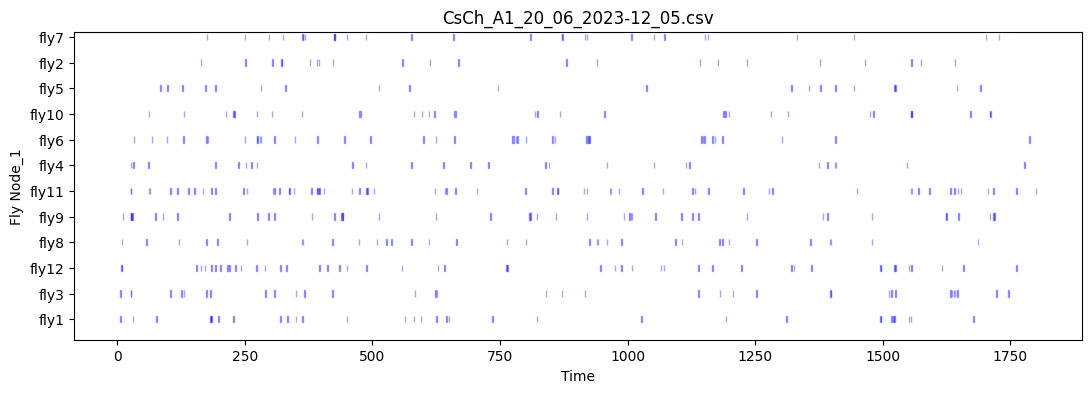

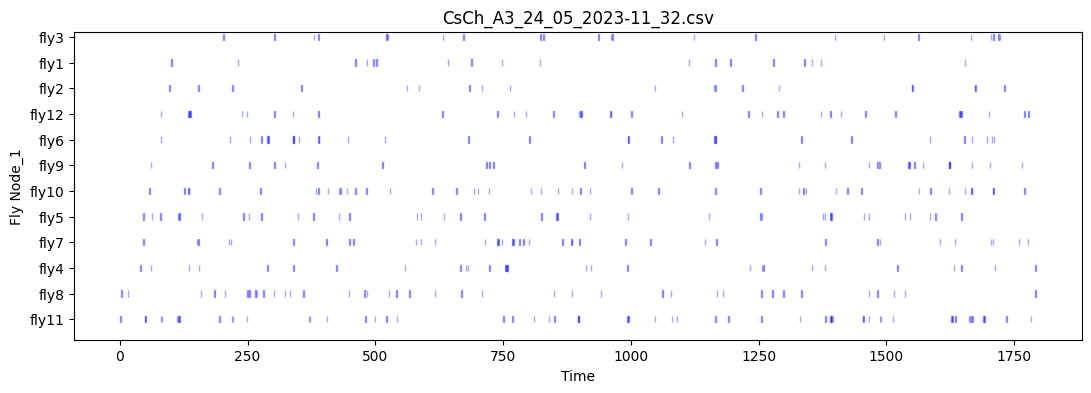

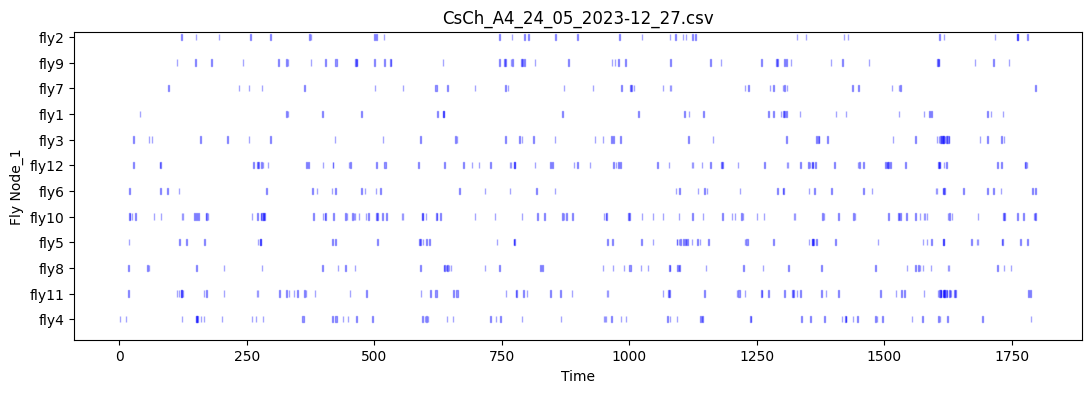

In [3]:
import pandas as pd
from src.utils import fileio
import matplotlib.pyplot as plt
import os
os.environ['OPENBLAS_NUM_THREADS'] = '1'

path = "/home/milky/drosophila-SNA/data/processed/1_0_find_interactions/CsCh"

files = fileio.load_files_from_folder(path)

# plt.figure(figsize=(14, 4))
for file_name, file_path in files.items():
    plt.figure(figsize=(13, 4))
    df = pd.read_csv(file_path)

    # Iterate through unique node_1 values
    for idx, node_1_value in enumerate(df["node_1"].unique(), start=1):
        # Filter data for the current node_1 value
        node_1_df = df[df["node_1"] == node_1_value]

        # Plot interaction lines
        for _, interaction in node_1_df.iterrows():
            plt.fill_between([interaction["start_of_interaction"]/24, interaction["end_of_interaction"]/24],
                             [idx - 0.12, idx - 0.12],
                             [idx + 0.12, idx + 0.12],
                             alpha=0.35, color='blue')

    plt.xlabel('Time')
    plt.ylabel('Fly Node_1')
    plt.title(file_name)
    plt.ylim(0.2, len(df["node_1"].unique()) + 0.2)  # Adjust y-axis limit to accommodate all node_1 values

    plt.yticks(range(1, len(df["node_1"].unique()) + 1), df["node_1"].unique())  # Set y-axis ticks as node_1 values

    plt.show()
    # sys.exit()
